In [8]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv("C:\\Users\\HP\\Desktop\\labs\\nnv_final_dmpa\\cleaned_data_1.csv")

# Select relevant features for anomaly detection
features_for_anomaly_detection = ['line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance', 'weight']

# Filter the data to include only the selected features
data_subset = data[features_for_anomaly_detection]

# Convert non-numeric values to NaN and then drop rows with NaN
data_subset = data_subset.apply(pd.to_numeric, errors='coerce').dropna()

X_train, X_test = train_test_split(data_subset, test_size=0.05, random_state=42)

z_scores_train = np.abs(zscore(X_train))

threshold =3

outliers_train = (z_scores_train > threshold).any(axis=1)

X_train['is_anomaly'] = outliers_train.astype(int)

z_scores_test = np.abs(zscore(X_test))

outliers_test = (z_scores_test > threshold).any(axis=1)

X_test['is_anomaly'] = outliers_test.astype(int)
y_true = X_test['is_anomaly']
y_pred = X_test['is_anomaly']
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

from sklearn.metrics import confusion_matrix, classification_report
y_true_train = X_train['is_anomaly']

y_pred_train = X_train['is_anomaly']
conf_matrix = confusion_matrix(y_true_train, y_pred_train)

print("Confusion Matrix:")
print(conf_matrix)





Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[3916    0]
 [   0  355]]


In [9]:
# from sklearn.metrics import silhouette_score
# # Calculate the Silhouette Score
# silhouette_avg = silhouette_score(X_train, y_pred_train)

# print(f"Silhouette Score: {silhouette_avg:.2f}")

In [10]:
# Analyzing results
print(pd.value_counts(y_pred_train))
print(X_train.loc[y_pred_train == 1, :])

is_anomaly
0    3916
1     355
Name: count, dtype: int64
      line_item_quantity  unit_price  pack_price  line_item_value  \
2130                  40        0.47      125.94          5037.72   
3608               65763        0.42       12.49        821379.87   
2805                 120        0.75       90.00         10800.00   
893                  995        1.17       70.00         69650.00   
4803               50867        0.44       13.15        668901.05   
...                  ...         ...         ...              ...   
3781                 102        0.75       90.00          9180.00   
619                 1847        1.17       70.00        129290.00   
5382               85919        0.14        8.26        709690.94   
3471              172428        0.05        2.87        494868.36   
5113               51520        0.04        2.31        119011.20   

      line_item_insurance   weight  is_anomaly  
2130                10.86     11.0           1  
3608            

C:\Users\HP\AppData\Local\Temp\ipykernel_12856\596931369.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(y_pred_train))


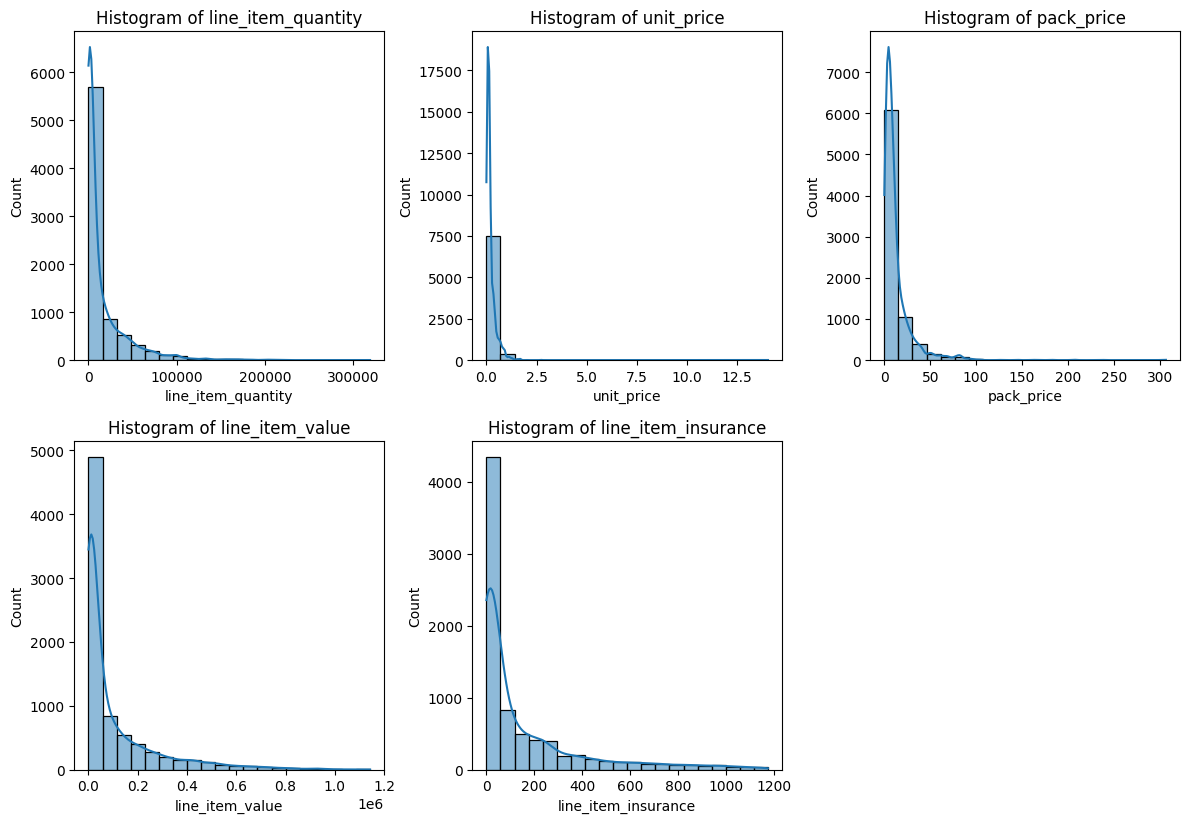

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
attributes = ['line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance']

data = pd.read_csv("C:\\Users\\HP\\Desktop\\labs\\nnv_final_dmpa\\cleaned_data_1.csv")

plt.figure(figsize=(12, 12))

for i, attribute in enumerate(attributes, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(data[attribute], bins=20, kde=True) 
    plt.title(f'Histogram of {attribute}')

plt.tight_layout()
plt.show()

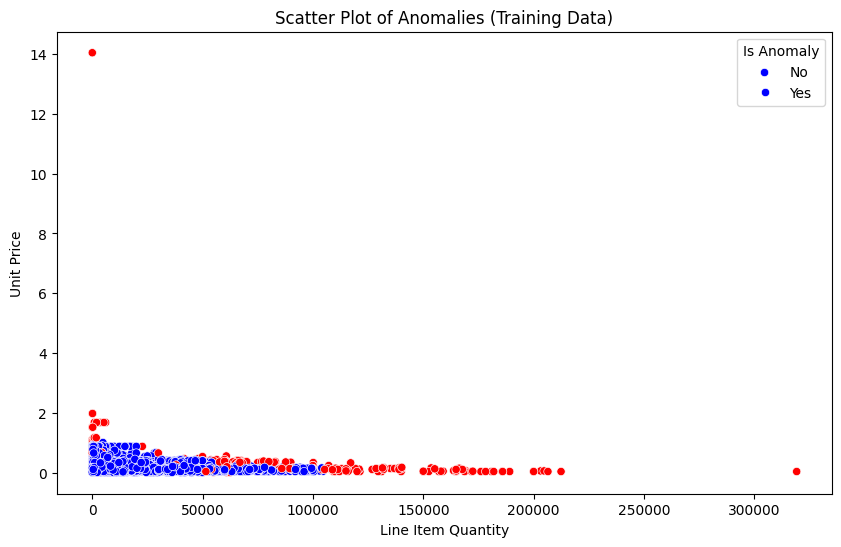

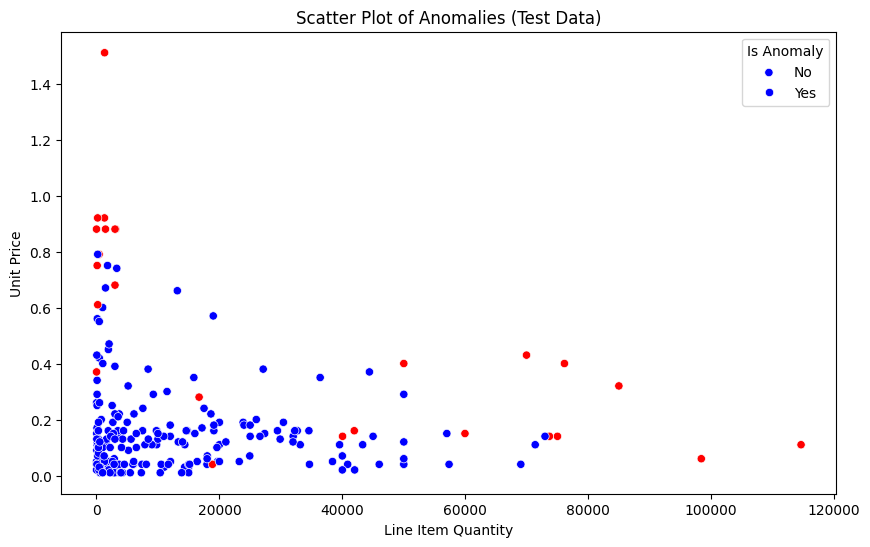

In [12]:
# Scatter plot for the first two features in the training data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='line_item_quantity', y='unit_price', hue='is_anomaly', data=X_train, palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot of Anomalies (Training Data)')
plt.xlabel('Line Item Quantity')
plt.ylabel('Unit Price')
plt.legend(title='Is Anomaly', labels=['No', 'Yes'])
plt.show()

# Scatter plot for the first two features in the test data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='line_item_quantity', y='unit_price', hue='is_anomaly', data=X_test, palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot of Anomalies (Test Data)')
plt.xlabel('Line Item Quantity')
plt.ylabel('Unit Price')
plt.legend(title='Is Anomaly', labels=['No', 'Yes'])
plt.show()


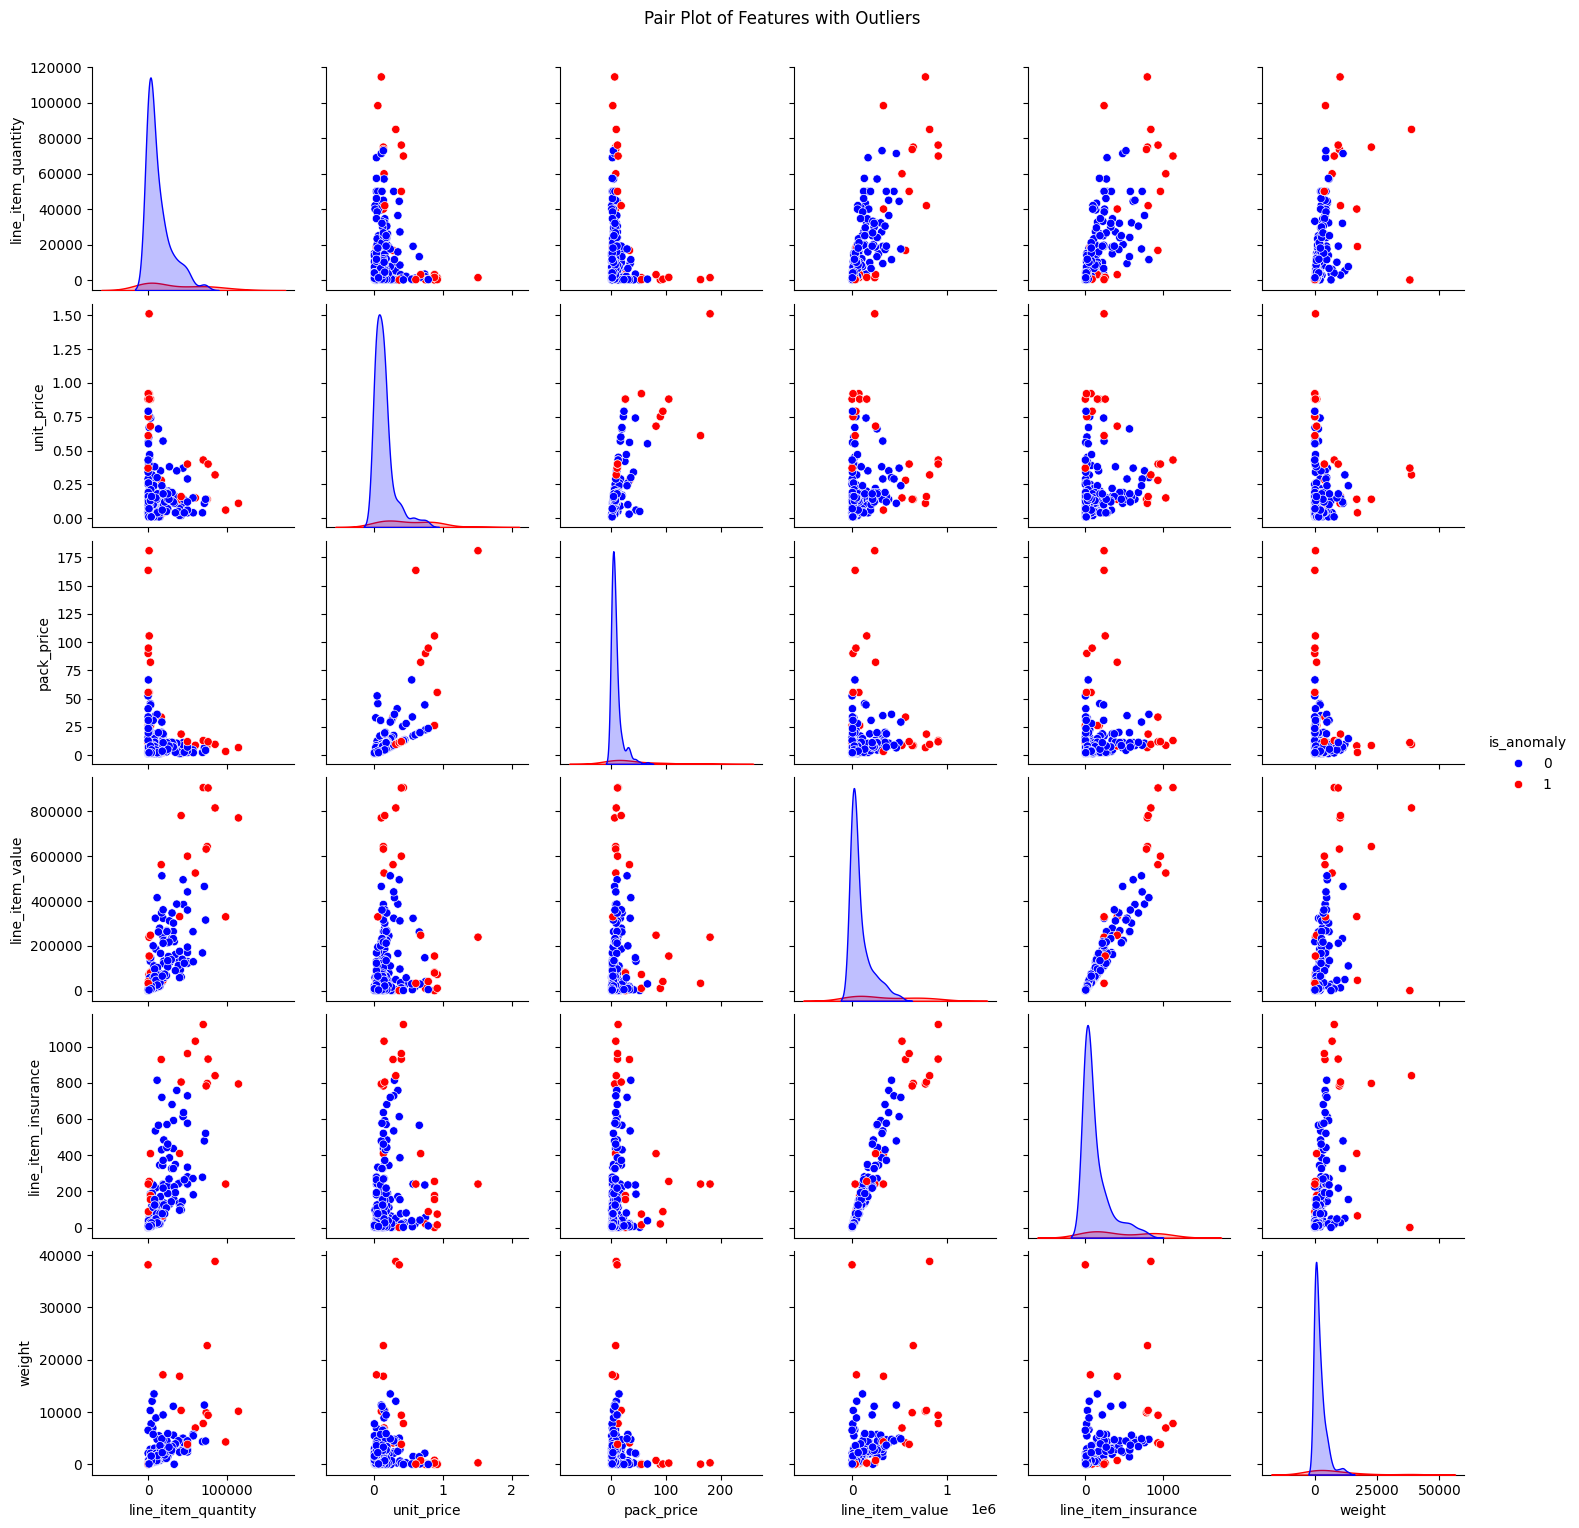

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_test has columns 'line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance', 'weight', 'is_anomaly'
# Adjust column names based on your actual DataFrame

features_for_pairplot = ['line_item_quantity', 'unit_price', 'pack_price', 'line_item_value', 'line_item_insurance', 'weight', 'is_anomaly']

X_test_subset = X_test[features_for_pairplot]

# Plot pair plot
sns.pairplot(X_test_subset, hue='is_anomaly', palette={0: 'blue', 1: 'red'})
plt.suptitle('Pair Plot of Features with Outliers', y=1.02)
plt.show()
